In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv
/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv


Read the train and test data set first

In [2]:
import matplotlib.pyplot as plt

In [3]:
train= pd.read_csv('../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')
test= pd.read_csv('../input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 13)

Will look for the data description 

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#print the unique values in the object variables
print('Married: ' + str(train['Married'].unique()))
print('Dependents: '+ str(train['Dependents'].unique()))
print('Education: '+ str(train['Education'].unique()))
print('Self_Employed: '+ str(train['Self_Employed'].unique()))
print('Property_Area: '+ str(train['Property_Area'].unique()))

Married: ['No' 'Yes' nan]
Dependents: ['0' '1' '2' '3+' nan]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Property_Area: ['Urban' 'Rural' 'Semiurban']


In [7]:
print('Loan status',train['Loan_Status'].value_counts())



Loan status Y    422
N    192
Name: Loan_Status, dtype: int64


The data set is not balanced in outputs

In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Checking the missing values in the dataset

In [9]:
# will look for the missing vlaues in the data
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

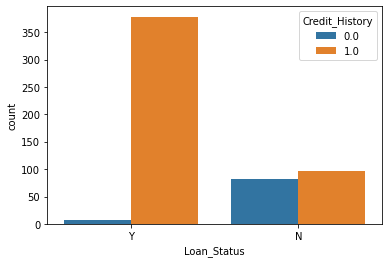

In [10]:
#checking the relatioship between the variables and target 
import seaborn as sns

sns.countplot(train['Loan_Status'],hue=train['Credit_History'])

In [11]:
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


In [12]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [13]:
#will impute the missing values by 1 since 1 have the most frequesnt values in the dataset
train['Credit_History']= train['Credit_History'].fillna(1.0)

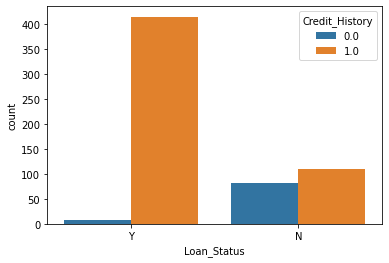

In [14]:
sns.countplot(train['Loan_Status'],hue=train['Credit_History'])

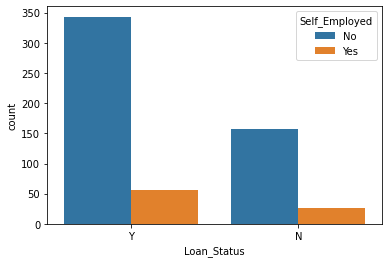

In [15]:
#next we have self employed column to look 
sns.countplot(train['Loan_Status'],hue=train['Self_Employed'])

In [16]:
train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [17]:

#fill the missing values by No in data set
train['Self_Employed']= train['Self_Employed'].fillna('No')

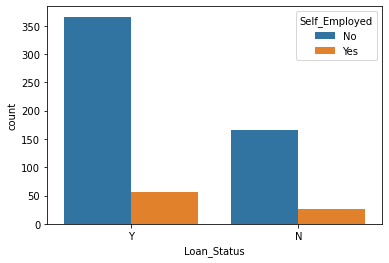

In [18]:
sns.countplot(train['Loan_Status'],hue=train['Self_Employed'])

Next we have Loan amount variable to look and since its a numerical variable we will look for scatter plot

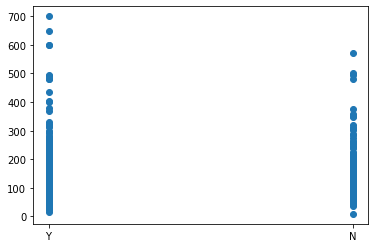

In [19]:
plt.scatter(train['Loan_Status'],train['LoanAmount'])

In [20]:
#will fill the missing values with the mean value
train['LoanAmount']=train['LoanAmount'].fillna(train.LoanAmount.mean())

In [21]:
train.isnull().sum().sort_values(ascending=False)

Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
Credit_History        0
LoanAmount            0
CoapplicantIncome     0
ApplicantIncome       0
Self_Employed         0
Education             0
Loan_ID               0
dtype: int64

In [22]:
train['Dependents'].isnull().sum()/len(train['Dependents'])

0.024429967426710098

In [23]:
#drop the other missing values from the data
train.dropna(inplace=True)

In [24]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,573.000000,573.000000,573.000000,573.000000,573.000000
mean,5328.514834,1641.359372,146.016131,341.675393,0.869110
std,5909.329219,3001.139055,82.569554,65.186012,0.337575
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,129.000000,360.000000,1.000000
75%,5815.000000,2302.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,650.000000,480.000000,1.000000


#  Handling the outliers from the dataset 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f43951a8410>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4395197a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f439512b990>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4395121410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4395121790>],
 'means': []}

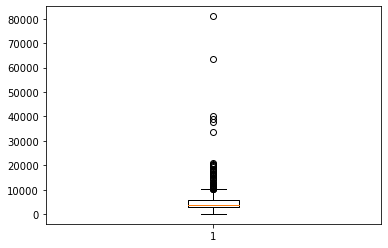

In [25]:
plt.boxplot(train['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4395106510>,
 'caps': [<matplotlib.lines.Line2D at 0x7f439502fbd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4395027b90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f43950356d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4395035c10>],
 'means': []}

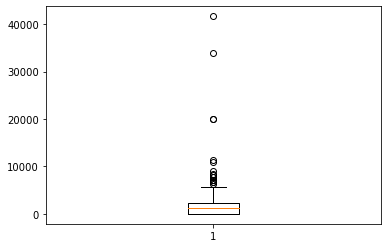

In [26]:
plt.boxplot(train['CoapplicantIncome'])

In [27]:
#creating a new variable called total income by adding applicant income + coapplicant income

train['TotalIncome']= train['ApplicantIncome']+train['CoapplicantIncome']

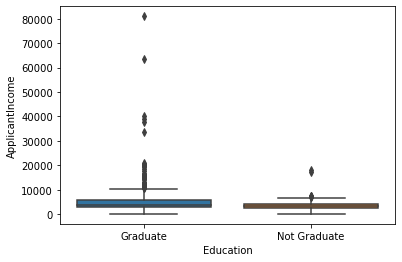

In [28]:
sns.boxplot(x='Education',y='ApplicantIncome',data=train)

We can see that graduate people also having same outliers since they are graduate their income must be higher we will chekck the same with coapplicant income

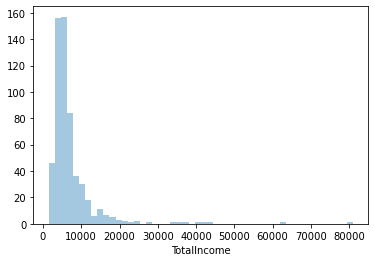

In [29]:
sns.distplot(train.TotalIncome,kde=False)

In [30]:

train = train.drop(columns=['Loan_ID'],axis=1)

In [31]:
#Next, make all other columns numerical as well. 
train['Married'] = np.where((train['Married'] == 'Yes'), 1, 0)
train['Gender'] = np.where((train['Gender'] == 'Female'), 1, 0)
train['Education'] = np.where((train['Education'] == 'Graduate'), 1, 0)
train['Self_Employed'] = np.where((train['Self_Employed'] == 'Yes'), 1, 0)
train['Dependents'] = np.where((train['Dependents'] == '0'), 0, 1)
train['Loan_Status'] = np.where((train['Loan_Status'] == 'Y'), 1, 0)

In [32]:
train['Property_Area'].value_counts()

Semiurban    219
Urban        185
Rural        169
Name: Property_Area, dtype: int64

In [33]:
#Doing label encoding the categorical features
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['Property_Area']=le.fit_transform(train['Property_Area'])

In [34]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0


In [35]:
y= train['Loan_Status']
X= train.drop(columns=['Loan_Status'])

Selecting Important features 

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Name of the column','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

   Name of the column         Score
6   CoapplicantIncome  13483.850271
11        TotalIncome  11695.570410
5     ApplicantIncome   3509.190756
7          LoanAmount     98.723124
9      Credit_History     19.248679
1             Married      2.015821
3           Education      0.579009
10      Property_Area      0.379558
8    Loan_Amount_Term      0.363129
0              Gender      0.306793


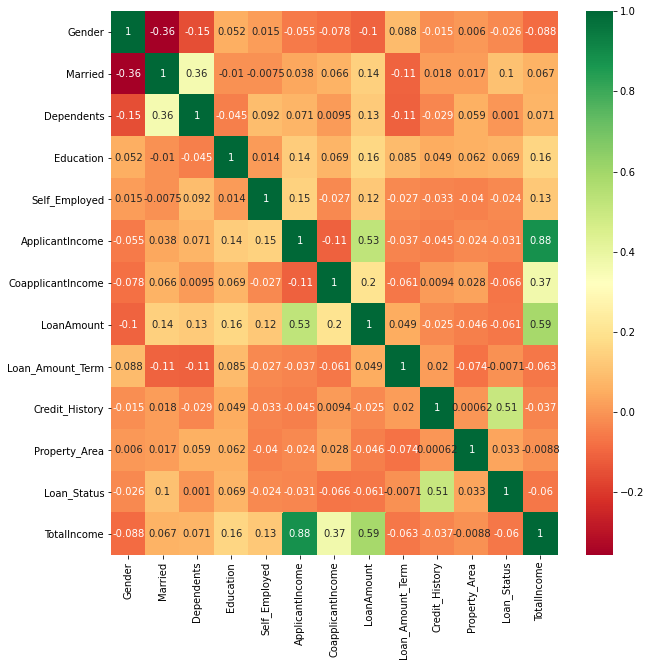

In [37]:
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Married,credit history,coapplicantincome,loan amount,total income having high importance in variables list

In [38]:
X= X[['Married','Credit_History','TotalIncome','CoapplicantIncome','LoanAmount','ApplicantIncome']]

In [39]:
X.head()

,Married,Credit_History,TotalIncome,CoapplicantIncome,LoanAmount,ApplicantIncome
0,0,1.0,5849.0,0.0,146.412162,5849
1,1,1.0,6091.0,1508.0,128.000000,4583
2,1,1.0,3000.0,0.0,66.000000,3000
3,1,1.0,4941.0,2358.0,120.000000,2583
4,0,1.0,6000.0,0.0,141.000000,6000


In [40]:
X.shape,y.shape

((573, 6), (573,))

In [41]:
y.value_counts()

1    398
0    175
Name: Loan_Status, dtype: int64

dataset is not balanced so we use smote algorithm to balance the output

In [42]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X, y = sm.fit_sample(X, y)

In [43]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [45]:
#spliiitng the test train
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=6)

In [46]:
x_train.shape,x_test.shape

((557, 6), (239, 6))

In [47]:
#fitting Logistic regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [48]:
log.fit(x_train,y_train)

LogisticRegression()

In [49]:
import pickle


In [50]:
#saving my model to pickle file
pickle.dump(log,open('model_pkl','wb'))

In [51]:
model = pickle.load(open('model_pkl','rb'))

In [52]:
x_test

,Married,Credit_History,TotalIncome,CoapplicantIncome,LoanAmount,ApplicantIncome
505,0,0.0,2138.000000,0.000000,99.000000,2138
384,1,0.0,6096.000000,0.000000,218.000000,6096
122,1,1.0,3459.000000,0.000000,25.000000,3459
523,1,1.0,6486.000000,2306.000000,182.000000,4180
596,1,1.0,6799.264152,2467.793626,111.896548,4331
...,...,...,...,...,...,...
454,1,1.0,6666.000000,2083.000000,160.000000,4583
53,1,1.0,10330.000000,2250.000000,180.000000,8080
12,1,1.0,11179.000000,8106.000000,200.000000,3073
98,1,1.0,12543.000000,1126.000000,225.000000,11417


In [53]:
q= model.predict([[1,1.0,459.000000,0.000000,25.000000,3459]])

In [54]:
q[0]

1

In [55]:
log.score(x_train,y_train)

0.725314183123878

In [56]:
#Predicting test dataset
pred=log.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7447698744769874

In [58]:
from sklearn import metrics
metrics.confusion_matrix(y_test,pred)

array([[85, 27],
       [34, 93]])

In [59]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74       112
           1       0.78      0.73      0.75       127

    accuracy                           0.74       239
   macro avg       0.74      0.75      0.74       239
weighted avg       0.75      0.74      0.75       239



Will try with Decision tree

In [60]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
clf.score(x_train,y_train)

1.0

In [62]:
pred1=clf.predict(x_test)

In [63]:
metrics.confusion_matrix(y_test,pred1)

array([[90, 22],
       [35, 92]])

In [64]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       112
           1       0.81      0.72      0.76       127

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.77      0.76      0.76       239



Logistic regression performed well out of two models